In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("daily-total-female-births-CA.csv", header=0)

In [ ]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
df["date"].dtype

dtype('O')

**so it is identifying date as strings, but we want these** **values as dates:**

**So we will use parse_dates parameter, and pandas will auto. identify format of column and convert into date**


In [ ]:
df2 = pd.read_csv("daily-total-female-births-CA.csv", header=0, parse_dates=[0]) # dates is at 0th column so "[0]"

In [ ]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
df2["date"].dtype

dtype('<M8[ns]')

so format is M8 this stands for date time format :

In [ ]:
series = pd.read_csv("daily-total-female-births-CA.csv", header=0, parse_dates=[0], index_col=0)

In [ ]:
series.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


## **Exploring Time Series Data :**

In [ ]:
series.shape

(365, 1)

In [ ]:
df2.shape

(365, 2)

## **Querying by time :**

In [ ]:
print(series.loc['1959-01'])

            births
date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
1959-01-06      29
1959-01-07      45
1959-01-08      43
1959-01-09      38
1959-01-10      27
1959-01-11      38
1959-01-12      33
1959-01-13      55
1959-01-14      47
1959-01-15      45
1959-01-16      37
1959-01-17      50
1959-01-18      43
1959-01-19      41
1959-01-20      52
1959-01-21      34
1959-01-22      53
1959-01-23      39
1959-01-24      32
1959-01-25      37
1959-01-26      43
1959-01-27      39
1959-01-28      35
1959-01-29      44
1959-01-30      38
1959-01-31      24


In [ ]:
df2[(df2["date"] > '1959-01-3') & (df2["date"] <= "1959-01-21")]

,date,births
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38
11,1959-01-12,33
12,1959-01-13,55


###**Descriptive Statistics :**

In [ ]:
series.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [ ]:
df2.describe()

,date,births
count,365,365.000000
mean,1959-07-02 00:00:00,41.980822
min,1959-01-01 00:00:00,23.000000
25%,1959-04-02 00:00:00,37.000000
50%,1959-07-02 00:00:00,42.000000
75%,1959-10-01 00:00:00,46.000000
max,1959-12-31 00:00:00,73.000000
std,NaN,7.348257


###**Time Series - Data Visualization :**

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
dataviz_df = df2.copy()

In [ ]:
dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


<Axes: >

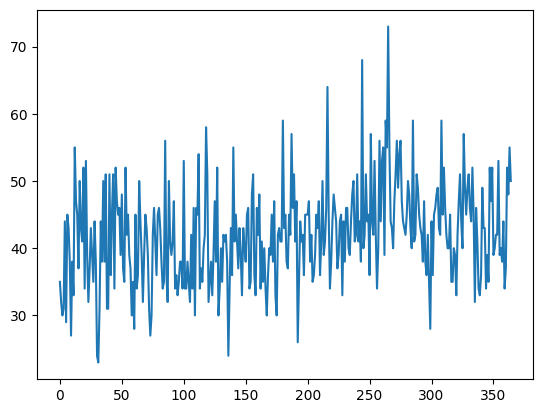

In [ ]:
dataviz_df["births"].plot()

on x axis we have index value and y -axis = birth,

but we need date in place of index value, so replace it

In [ ]:
dataviz_df.index = dataviz_df["date"]

<Axes: xlabel='date'>

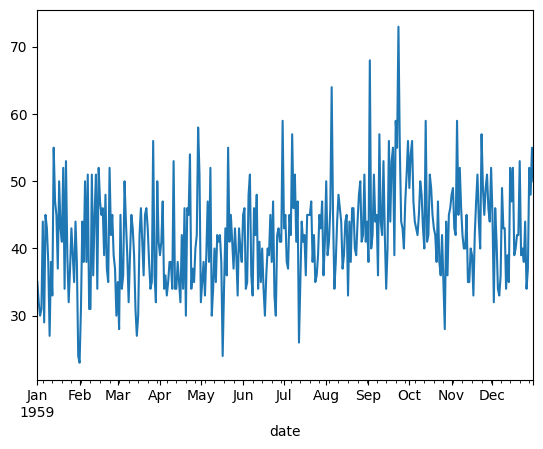

In [ ]:
dataviz_df["births"].plot()

on x axis = date, and y-axis = birth

###**Zooming In :**

In [ ]:
dataviz_df2 = dataviz_df[(dataviz_df["date"] > "1959-1-1") & (dataviz_df["date"] < "1959-01-10")].copy()

In [ ]:
dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


<Axes: xlabel='date'>

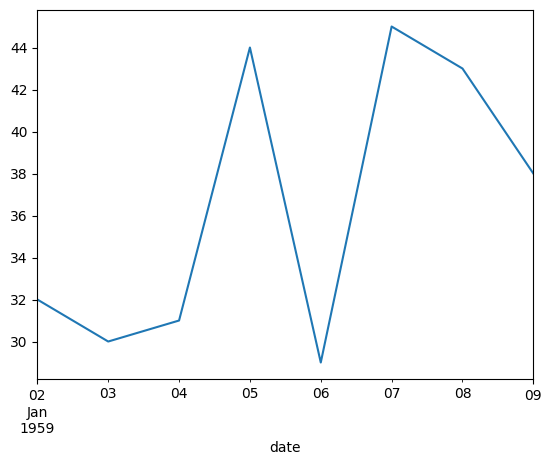

In [ ]:
dataviz_df2["births"].plot()

###**Trend Line :**

In [ ]:
import seaborn as sns

<Axes: ylabel='births'>

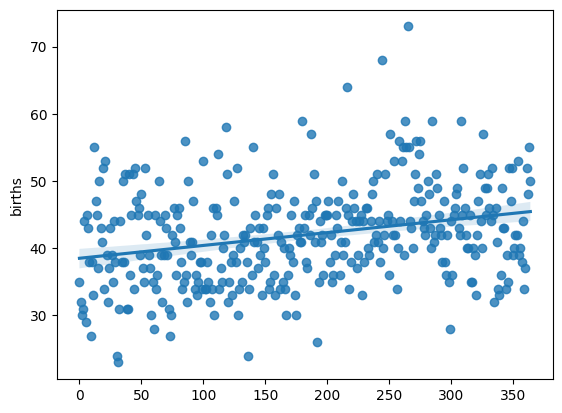

In [ ]:
sns.regplot(x = df2.index.values, y=df2["births"])

<Axes: ylabel='births'>

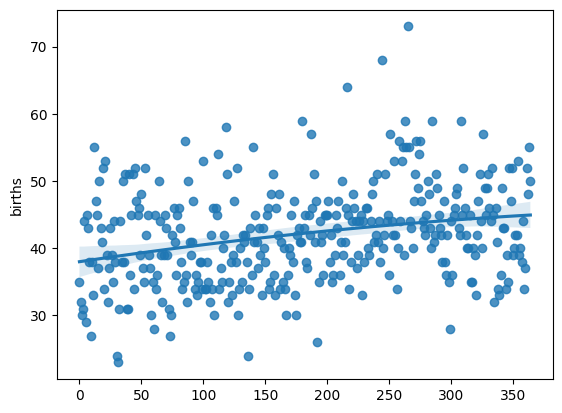

In [ ]:
sns.regplot(x = df2.index.values, y=df2["births"], order=2) # for quadratic and polynomial trend line order is used

<Axes: ylabel='births'>

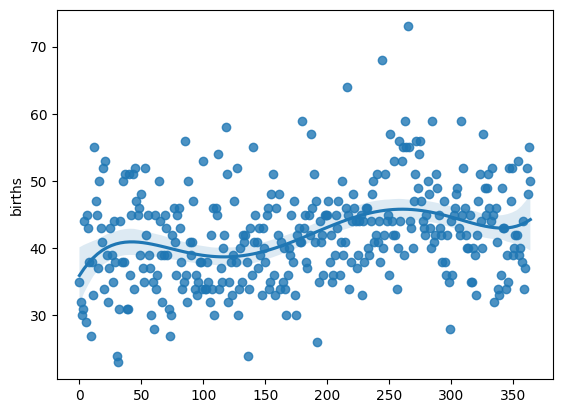

In [ ]:
sns.regplot(x = df2.index.values, y=df2["births"], order=5) # for quadratic and polynomial trend line order is used

#**Part 2 :**

In [ ]:
miles_df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header = 0)

In [ ]:
miles_df.head()

,Month,MilesMM
0,1963-01,6827
1,1963-02,6178
2,1963-03,7084
3,1963-04,8162
4,1963-05,8462


In [ ]:
miles_df.shape

(96, 2)

<Axes: >

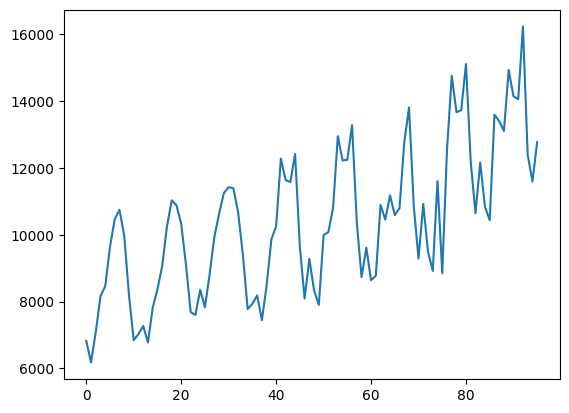

In [ ]:
miles_df['MilesMM'].plot()

<Axes: ylabel='MilesMM'>

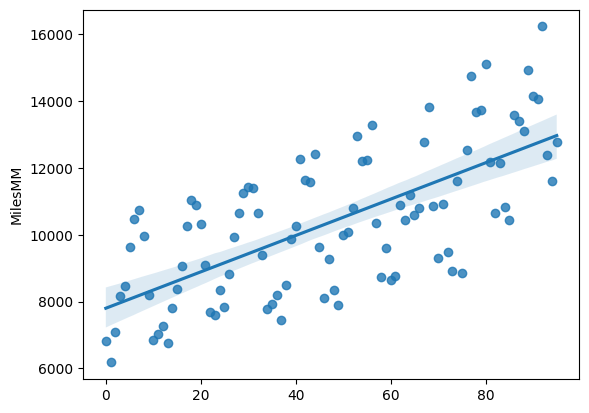

In [ ]:
sns.regplot(x = miles_df.index.values, y= miles_df["MilesMM"])

<Axes: ylabel='MilesMM'>

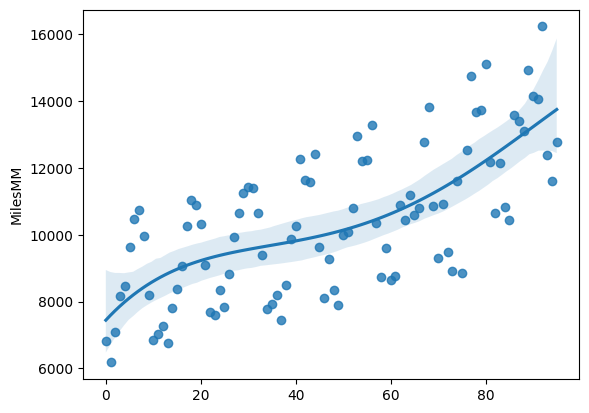

In [ ]:
sns.regplot(x = miles_df.index.values, y= miles_df["MilesMM"],  order=4)

###**Removing Seasonality :**
get the data on basis of each year by taking average :

In [ ]:
miles_df.head()

,Month,MilesMM
0,1963-01,6827
1,1963-02,6178
2,1963-03,7084
3,1963-04,8162
4,1963-05,8462


In [ ]:
miles_df["Month"] = pd.to_datetime(miles_df["Month"])

In [ ]:
miles_df["year"] = miles_df["Month"].dt.year

In [ ]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [ ]:
miles_df.groupby("year").mean()

,Month,MilesMM
year,,
1963,1963-06-16 12:00:00,8300.250000
1964,1964-06-16 08:00:00,8849.333333
1965,1965-06-16 12:00:00,9619.250000
1966,1966-06-16 12:00:00,9929.500000
1967,1967-06-16 12:00:00,10542.916667
1968,1968-06-16 08:00:00,10747.916667
1969,1969-06-16 12:00:00,11972.000000
1970,1970-06-16 12:00:00,13124.750000


<Axes: xlabel='year'>

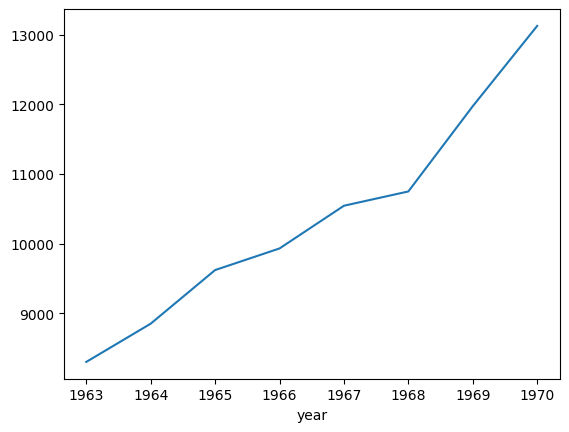

In [ ]:
miles_df.groupby("year")["MilesMM"].mean().plot()

###**Creating Lag Plots :**
used for prediction as prediction of weather is done by analyzing the previous data :

In [ ]:
miles_df["lag1"] = miles_df["MilesMM"].shift(1)  # shift all value by 1 time period

In [ ]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<Axes: xlabel='lag1', ylabel='MilesMM'>

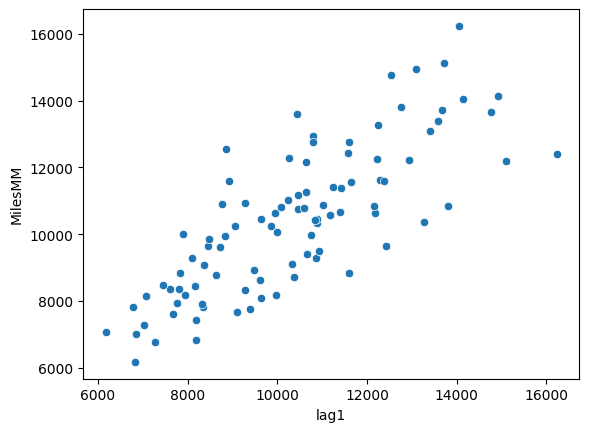

In [ ]:
sns.scatterplot(x=miles_df["lag1"], y= miles_df["MilesMM"])

so this was plot bet. lagvalue and original value :

#### **Another method of plotting lag_plot :**

In [ ]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

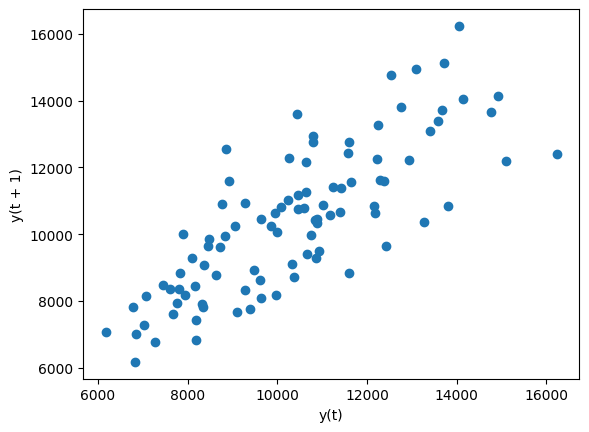

In [ ]:
lag_plot(miles_df["MilesMM"])

###**Autocorrelation Plot :**

In [ ]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

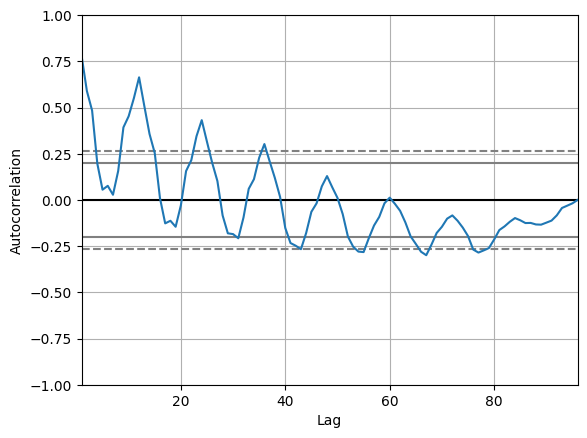

In [ ]:
autocorrelation_plot(miles_df["MilesMM"])

So we have correlation value on y axis

and lag values on x axis



##**Feature Engineering :**

### Date Time feature :

In [ ]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
features = df2.copy()

In [ ]:
features["year"]  = df2["date"].dt.year

In [ ]:
features["month"] = df2["date"].dt.month

In [ ]:
features["day"] = df2["date"].dt.day

In [ ]:
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [ ]:
features.head(10)

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5
5,1959-01-06,29,1959,1,6
6,1959-01-07,45,1959,1,7
7,1959-01-08,43,1959,1,8
8,1959-01-09,38,1959,1,9
9,1959-01-10,27,1959,1,10


#### Lag features :

In [ ]:
features["lag1"] = df2["births"].shift(1)    # get value of previous day for the next value

In [ ]:
features["lag2"] = df2["births"].shift(365)  # get value at same day but last year

In [ ]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


#### Window Features :

In [ ]:
features["Roll_mean"] = df2["births"].rolling(window=2).mean()  # we will get mean of 2 values(last and current)

In [ ]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [ ]:
features["Roll_max"] = df2["births"].rolling(window=3).max()  # get max of 3 values (2nd prev, prev, current)

In [ ]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


#### Expanding Features :

In [ ]:
features["Expand_max"] = df2["births"].expanding().max()  # give only maximum value and update value when more max is came in the dataset.

In [ ]:
features.head(10)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,45.0,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,43.0,NaN,40.5,45.0,45.0
9,1959-01-10,27,1959,1,10,38.0,NaN,32.5,43.0,45.0


## **DownSampling and UpSampling :**

Downsampling : convert the quater data of various year to only yearly data

upsampling : convert the yearly data to quater/month data

In [ ]:
miles_df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header = 0, parse_dates=[0])

In [ ]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


#### Downsampling :

In [ ]:
quaterly_miles_df = miles_df.resample("Q", on="Month").mean()  # convert the yearly data to quaterly "on" month.

<ipython-input-66-f263e9298af3>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quaterly_miles_df = miles_df.resample("Q", on="Month").mean()  # convert the yearly data to quaterly "on" month.


In [ ]:
quaterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [ ]:
yearly_total_miles_df = miles_df.resample("A", on="Month").sum()  # "A" means year or Annual , so convert data in yearly dataset.

<ipython-input-68-50391e275407>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_total_miles_df = miles_df.resample("A", on="Month").sum()  # "A" means year or Annual , so convert data in yearly dataset.


In [ ]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


## We can use differnet data also like :
B = business day

D = calender day

W = weekly

M = Month end

Q = quarter end

A = year

Ba = Business Year

and so on..

#### **Note : Earlier we used "Groupby" function to convert the data**
#### **But Now we have used the simple method that is "resample" function.**

## **UpSampling :**

In [ ]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [ ]:
upsampled_miles_df = miles_df.resample("D", on="Month").mean()

In [ ]:
upsampled_miles_df.head(10)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [ ]:
interpolated_miles_df = upsampled_miles_df.interpolate(method="linear")

In [ ]:
interpolated_miles_df.head(10)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<Axes: xlabel='Month'>

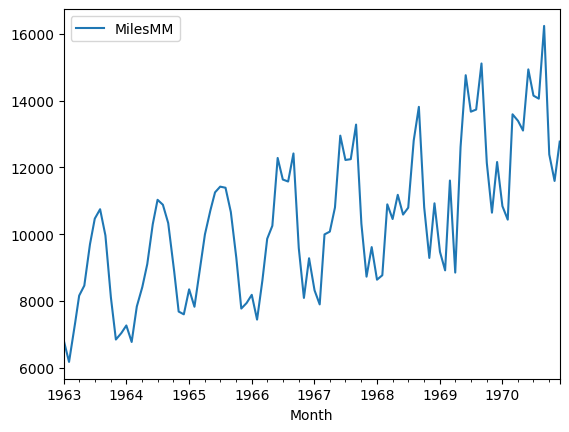

In [ ]:
interpolated_miles_df.plot()

In [ ]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method="spline", order=2)  # we use order =2 for quadratic line.

In [ ]:
poly_interpolated_miles_df.head()

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6775.328886
1963-01-03,6725.739829
1963-01-04,6678.197709
1963-01-05,6632.702526


<Axes: xlabel='Month'>

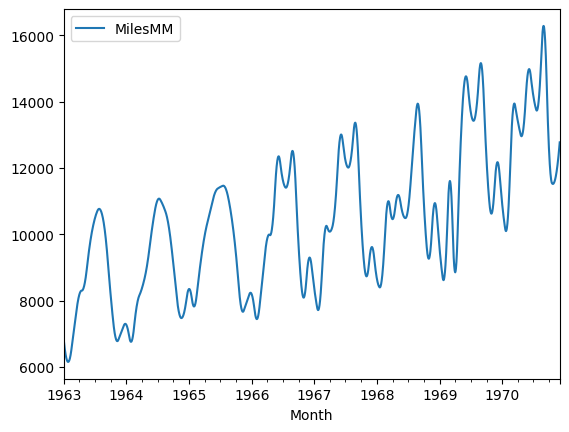

In [ ]:
poly_interpolated_miles_df.plot()

## **So we used "mean" function in the upsample, can also use another upon their requirement :**

bfill = backward fill

count = count of values

fill = forward fill

min = minimum

std = standrd deviation of the value

and so on....

## **Decomposing Time Series :**

Additive Model :
y(t) = Level + Trend + Seasonality + Noise

Multiplicative Model :
y(t) = Level * Trend * Seasonality * Noise

In [ ]:
from

SyntaxError: invalid syntax (<ipython-input-79-09c8a0c03c80>, line 1)